<a href="https://colab.research.google.com/github/sahilmaddi1234/ipl-winner-predictor-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn
data = pd.read_csv("/content/matches.csv")
df=pd.DataFrame(data)
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
data['Season'] = data['Season'].str.replace('IPL-', '').astype(int)

In [ ]:
df.describe()

,id,Season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
df = df.iloc[:,:-1]
df.dropna(inplace=True)

In [ ]:
df["team1"].unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

Text(0.5, 1.0, 'IPL matches won')

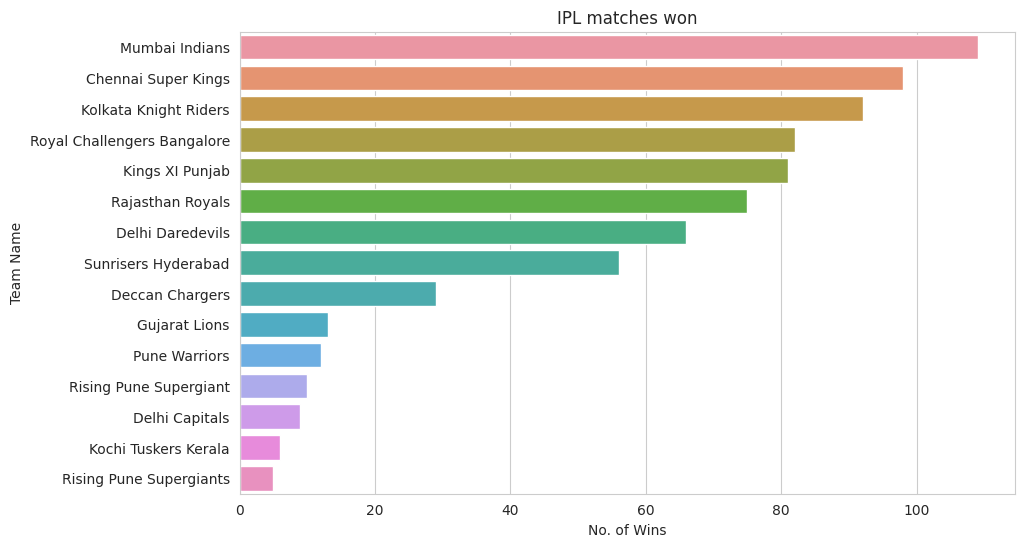

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = df,order= df['winner'].value_counts().index)
plt.xlabel('No. of Wins')
plt.ylabel('Team Name')
plt.title('IPL matches won')

Text(0.5, 1.0, 'Matches played in different stadiums')

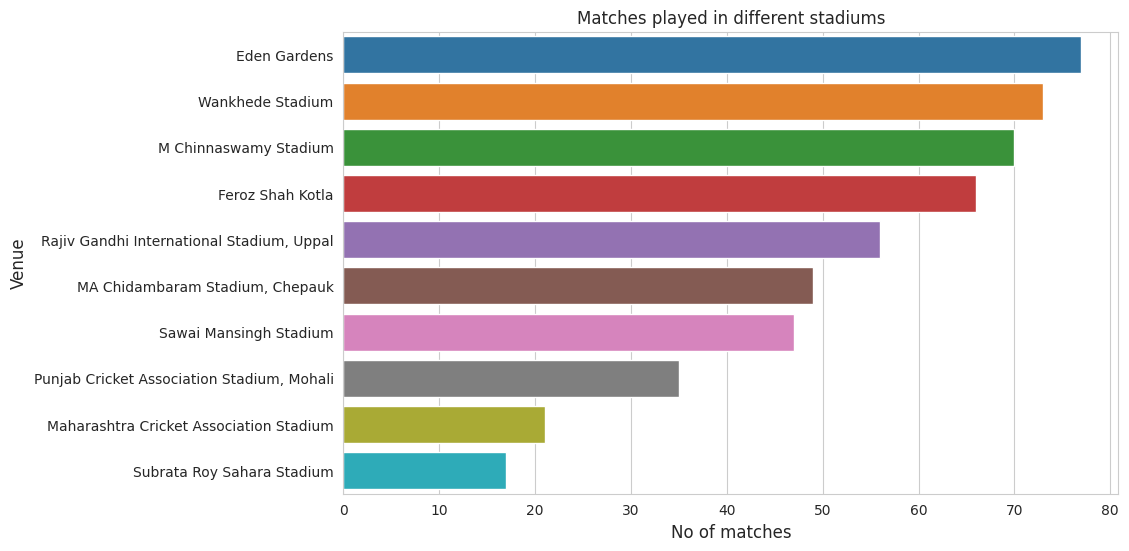

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = df,order = df['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Matches played in different stadiums')

Text(0.5, 1.0, 'Field/Bat')

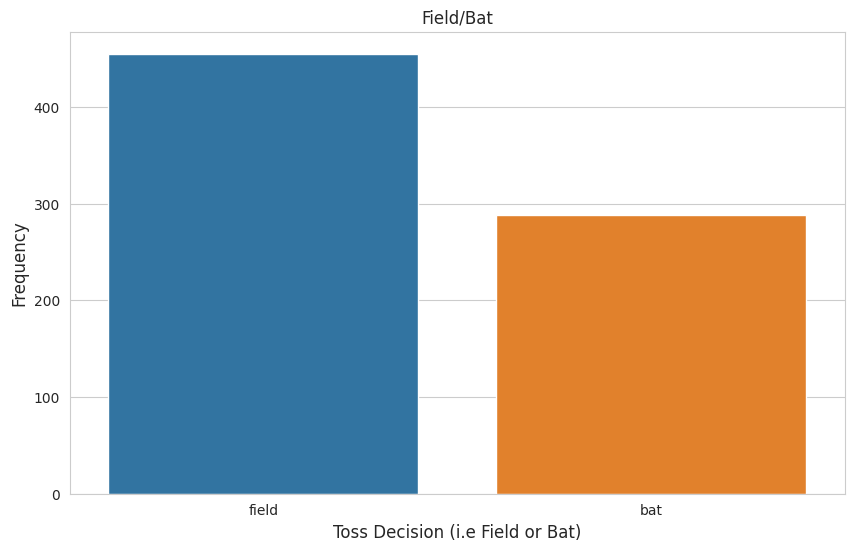

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=df)
plt.xlabel('Toss Decision (i.e Field or Bat)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Field/Bat')

In [ ]:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(df[i].unique())
  print(df[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur      

In [ ]:
df.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)
X = df.drop(["winner"], axis=1)
y = df["winner"]
X = pd.get_dummies(X, columns=["team1", "team2", "toss_winner", "toss_decision", "result"], drop_first=True)

from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
y = labelen.fit_transform(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=170,min_samples_split=3,
                               max_features = "auto")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8859060402684564

In [ ]:
X = df.drop(["winner"], axis=1)
y = df["winner"]

In [ ]:
X = pd.get_dummies(X, columns=["team1", "team2", "toss_winner", "toss_decision", "result"], drop_first=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
y = labelen.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=170,min_samples_split=3,
                               max_features = "auto")

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=170)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.8691275167785235

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("matches.csv")


data['Season'] = data['Season'].str.replace('IPL-', '').astype(int)

team_encoder = LabelEncoder()
data['team1_encoded'] = team_encoder.fit_transform(data['team1'])
data['team2_encoded'] = team_encoder.transform(data['team2'])
data['toss_winner_encoded'] = team_encoder.transform(data['toss_winner'])
data = data.dropna(subset=['winner'])
data['winner_encoded'] = team_encoder.transform(data['winner'])



X = data[['Season', 'team1_encoded', 'team2_encoded', 'toss_winner_encoded']]
y = data['winner_encoded']


clf = RandomForestClassifier(n_estimators=100, random_state=42)


clf.fit(X, y)


new_match_data = pd.read_csv("matches.csv")
new_match_data['Season'] = new_match_data['Season']
new_match_data['Season'] = new_match_data['Season'].str.replace('IPL-', '').astype(int)


new_match_data['team1_encoded'] = team_encoder.transform(new_match_data['team1'])
new_match_data['team2_encoded'] = team_encoder.transform(new_match_data['team2'])
new_match_data['toss_winner_encoded'] = team_encoder.transform(new_match_data['toss_winner'])


predicted_winner_encoded = clf.predict(new_match_data[['Season', 'team1_encoded', 'team2_encoded', 'toss_winner_encoded']])
predicted_winner = team_encoder.inverse_transform(predicted_winner_encoded)
print(f"Predicted winner of the upcoming match: {predicted_winner[0]}")


Predicted winner of the upcoming match: Sunrisers Hyderabad
